# <a href="https://thetahat.ru/courses/ph-ds-group">Phystech@DataScience</a>
## Домашнее задание 2. <font color="green">Профиль биология</font>

**Правила, <font color="red">прочитайте внимательно</font>:**

1. Общее

     * Выполненную работу **в формате `ipynb`** нужно отправить телеграм-боту `@thetahat_phds26_bot` согласно <a href="https://thetahat.ru/instructions-bot"><b>инструкции</b></a>. **Работы, присланные иным способом, не принимаются.** Дедлайны указаны в боте, они являются строгими. Переносы дедлайнов осуществляются по установленным <a href="https://thetahat.ru/deadlines"><b>правилам</b></a>.
     
     * Обязательно изучите <a href="https://thetahat.ru/courses/design-hw"><b>руководство по оформлению ДЗ</b></a>. В частности, оно содержит примеры случаев, когда могут быть снижены баллы.
     
     * Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
     
     * Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания (в т.ч. злоупотребление ИИ) всем участникам нужно будет сдавать устный зачет.**
     
     * Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
     </br>

2. Правила заполнения ноутбука

     * Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения существующих ячеек.
     * Отвечайте на вопросы, а также добавляйте новые ячейки в любом количестве в предложенных местах, которые обозначены `<...>`.
     * Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз. Комментарии к решению пишите в markdown-ячейках.
     * Условия <font color="red"><b>запрещается модифицировать</b></font>.
     * При нарушении данных правил работа может получить 0 баллов.
</br>

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 60 баллов

In [49]:
# Bot check

# HW_ID: phds_hw2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

# Profile: Biology

### Ссылки на использование ИИ

Если при решении задач использовался ИИ, укажи здесь публичные ссылки на все чаты с ИИ и поясни, для каких целей он применялся. Обрати внимание на <a href="https://thetahat.ru/courses/ai-rules" target="_top">правила</a>.

**Задача 1**
1. ссылка
    - для чего использована
    - для чего использована
2. ссылка
    - для чего использована

**Задача 2**
1. ссылка
    - для чего использована


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from typing import Optional

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator

import warnings
# warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="whitegrid")

## <font color="blue">Легкая часть</font>
   

### Задача 1

#### 1. Взвешенный метод наименьших квадратов (Weighted Least Squares)

[Взвешенный МНК](https://www.itl.nist.gov/div898/handbook/pmd/section1/pmd143.htm?utm_source=chatgpt.com) используют, когда наблюдения имеют разную точность: более «надежным» измерениям дают больший вес. В физических/инженерных экспериментах так учитывают неодинаковую погрешность приборов и точек съёмки — веса позволяют «подтянуть» оценку туда, где измерения точнее и тем самым улучшить параметры калибровки и оценки неопределённости. В медицине и биостатистике это стандарт в мета-анализах: эффект каждого исследования агрегируют с [инверсно-дисперсными весами](https://mentalhealth.bmj.com/content/17/2/64?utm_source=chatgpt.com), чтобы большие и более точные выборки сильнее влияли на общий вывод.

>❕**Замечание:**❕Вес обычно пропорционален корню из обратной дисперсии ошибки

Реализацию взвешенного МНК  есть в различных библиотеках, например: [`sklearn`](https://sklearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?utm_source=chatgpt.com#:~:text=dtype%20if%20necessary.-,sample_weight,-array%2Dlike%20of), [`statsmodels`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.WLS.html?utm_source=chatgpt.com)

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$

* $Y\in\mathbb{R}^{n}$ — вектор отклика,
* $X\in\mathbb{R}^{n\times d}$ — матрица признаков (первая колонка может быть единичной для свободного члена),
* $\theta\in\mathbb{R}^{d}$ — параметры,
* $W=\mathrm{diag}(w_1,\dots,w_n)\in\mathbb{R}^{n\times n}$ — диагональная матрица **неотрицательных** весов.

Найдите решение задачи в матричном виде.

<...>

#### 2. Gradient Descent (для WLS)

Запишите формулу градиентного спуска для взвешенной линейной регрессии.

<...>

### Задача 2


#### 1. Ввод и описание датасета


**Контекст:** оценка опухолевой чистоты (tumor purity) — ключевая задача в онкогеномике. Иммунные клетки, стромальные компоненты и другие нормальные ткани, попадающие в образец при биопсии, искажают результаты анализа экспрессии генов, метилирования, мутационного профиля и CNV. Корректировка purity необходима для валидной биоинформатической интерпретации и построения надёжных биомаркеров.

В наборе **TCGA-BRCA** от [National Cancer Institute](https://portal.gdc.cancer.gov/) представлено несколько независимых методов оценки purity, каждый отражающий разные аспекты опухолевой биологии. Эти методы частично коррелируют, но имеют свои источники шума.

Набор **`data_imputed`** содержит клинические признаки участников TCGA-BRCA
и несколько purity-метрик. Цель — предсказать показатель **LUMP**, отражающий
иммунную инфильтрацию опухоли, на основе других методов purity и клинических
характеристик.

**Структура датасета:**

- **case_id** — внутренний уникальный идентификатор для каждого пациента

- **submitter_id** — это человеко-читаемый идентификатор пациента или образца, который подаёт исследователь

Каждая строка — один образец опухоли TCGA-BRCA (1077 наблюдений).

- **age_at_diagnosis** — возраст на момент постановки диагноза в *днях*.  
  (TCGA записывает возраст именно в днях; для получения лет делят на 365.25)

- **gender** — пол (female/male)

- **race** — этническая принадлежность

- **ethnicity** — клиническая этническая группа пациента

- **tumor_type** — тип опухолевого материала (биопсия, первичная опухоль, метастаз)

- **ESTIMATE** — оценка <abbr title="Насколько сильно опухолевые клетки проросли/заменили собой нормальную соединительную ткань">иммунной/стромальной инфильтрации</abbr> по экспрессии генов.

- **ABSOLUTE** — purity из <abbr title="сколько копий определённого участка ДНК есть в геноме клетки">копийности</abbr> (copy-number alterations).

- **LUMP** — (*Leukocyte UnMethylation for Purity*) показатель иммунной инфильтрации по неметилированным CpG-регионам. **Используется как целевой признак.**

- **IHC** — оценка чистоты по иммуногистохимическим данным (ручная разметка патологов).

- **CPE** — *Consensus Purity Estimate*, агрегат ESTIMATE + ABSOLUTE + LUMP + IHC. Наиболее стабильная метрика purity.

Такой подход используется в диагностике опухолей, при коррекции смешанной клеточности
(cellular deconvolution) и в мультиомных биомедицинских исследованиях.


Этот датасет и модели позволяют биологам количественно оценивать и восстанавливать иммунную инфильтрацию опухоли (через LUMP), учитывать tumor purity в анализе омics-данных и лучше понимать согласованность разных методов оценки чистоты, не теряя при этом клинический контекст.


 Загрузите данные и посмотрите на них

In [2]:
cancer = pd.read_csv("BRCA.csv")
cancer.head()

,case_id,submitter_id,gender,race,ethnicity,age_at_diagnosis,tumor_type,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE
0,eff2360e-399a-4167-ab2b-798e27bef739,TCGA-E2-A107,female,white,not hispanic or latino,20065.0,primary,0.913400,0.450000,0.876600,0.85,0.7959
1,5b2a4f11-ca46-4974-9420-59b4820920bf,TCGA-AC-A62X,female,black or african american,not hispanic or latino,26627.0,primary,0.938500,0.616935,0.971400,0.80,0.9269
2,f05d314c-5ec5-4e2a-b785-9a702716f111,TCGA-E2-A156,female,white,not hispanic or latino,22422.0,primary,0.934900,0.920000,0.788391,0.85,0.9221
3,f062cbd0-2426-40ac-a4be-e74ac61fa2a7,TCGA-A7-A56D,female,black or african american,not hispanic or latino,30783.0,primary,0.702100,0.635838,0.786605,0.65,0.5870
4,17d9e646-6ab3-40b3-a0bc-2c834d3c3213,TCGA-AR-A0U1,female,white,not hispanic or latino,13467.0,primary,0.742994,0.260000,0.768433,0.65,0.6227


Поскольку пока что нам не нужны уникальные индексы, удалите признаки `case_id` и `submitter_id`

In [5]:
data = cancer.drop(["case_id", "submitter_id"], axis=1)
data.head()

,gender,race,ethnicity,age_at_diagnosis,tumor_type,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE
0,female,white,not hispanic or latino,20065.0,primary,0.913400,0.450000,0.876600,0.85,0.7959
1,female,black or african american,not hispanic or latino,26627.0,primary,0.938500,0.616935,0.971400,0.80,0.9269
2,female,white,not hispanic or latino,22422.0,primary,0.934900,0.920000,0.788391,0.85,0.9221
3,female,black or african american,not hispanic or latino,30783.0,primary,0.702100,0.635838,0.786605,0.65,0.5870
4,female,white,not hispanic or latino,13467.0,primary,0.742994,0.260000,0.768433,0.65,0.6227


Посмотрите на описание признаков данных, есть ли в них категориальные признаки? Одинакового ли масштаба данные? Для этого можно воспользоваться методами `info()` и `describe()`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1077 non-null   object 
 1   race              1077 non-null   object 
 2   ethnicity         1077 non-null   object 
 3   age_at_diagnosis  1077 non-null   float64
 4   tumor_type        1077 non-null   object 
 5   ESTIMATE          1077 non-null   float64
 6   ABSOLUTE          1077 non-null   float64
 7   LUMP              1077 non-null   float64
 8   IHC               1077 non-null   float64
 9   CPE               1077 non-null   float64
dtypes: float64(6), object(4)
memory usage: 84.3+ KB


In [7]:
data.describe()

,age_at_diagnosis,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE
count,1077.000000,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21595.051794,0.75942,0.589452,0.788814,0.775805,0.727998
std,4666.660329,0.12600,0.156939,0.117485,0.105858,0.134607
min,9840.000000,0.23310,0.170000,0.231600,0.150000,0.134400
25%,18177.000000,0.68220,0.510000,0.760000,0.700000,0.656000
50%,21569.915651,0.77440,0.587329,0.794500,0.800000,0.746000
75%,24719.000000,0.85540,0.690000,0.853100,0.850000,0.822900
max,32872.000000,0.99430,0.990000,1.000000,0.980000,1.000000


**Вывод:**

Категориальные признаки - гендер, раса, этническая принадлежность и тип опухоли (т.к. эти данные имеют тип object, в то время как остальные - float64).
Все данные, кроме возраста опухоли в днях, имеют максимальное значение 1 или около того. Это не минимаксная нормализация, так как нижнее значение больше 0, однако суть в том, что все эти данные - это доля реального значения от нормального, поэтому масштаб у всех, кроме возраста, одинаковый. Возраст надо приводить к масштабу остальных данных.

In [16]:
data_ready = data[['age_at_diagnosis', 'ESTIMATE', 'ABSOLUTE','IHC','CPE','LUMP']]

В качестве таргета выберем показатель иммунной инфильтрации `LUMP`  

Уберите категориальные переменные и разделите нашу выборку на тренировочную и тестовую:

Не забудьте привести данные к единому масштабу, если это необходимо

In [19]:
from sklearn.preprocessing import MinMaxScaler
data_ready = MinMaxScaler().fit_transform(data_ready)
data_ready

array([[0.44394755, 0.89372044, 0.34146341, 0.84337349, 0.7642098 ,
        0.83940656],
       [0.72885551, 0.92669469, 0.54504238, 0.78313253, 0.91554991,
        0.9627798 ],
       [0.54628343, 0.92196532, 0.91463415, 0.84337349, 0.91000462,
        0.72461122],
       ...,
       [0.44511983, 0.79558592, 0.35365854, 0.90361446, 0.59623383,
        0.40044248],
       [0.33796457, 0.79729375, 0.69512195, 0.78313253, 0.78581331,
        0.65616866],
       [0.48463008, 0.7850762 , 0.80487805, 0.81325301, 0.7465342 ,
        0.75056878]])

In [24]:
columns = ['age_at_diagnosis', 'ESTIMATE', 'ABSOLUTE','IHC','CPE','LUMP']
dataframe = pd.DataFrame(data_ready)
dataframe.columns = columns
cat_features = data_ready[:,0:5]
target = data_ready[:, 5]
dataframe.head()

,age_at_diagnosis,ESTIMATE,ABSOLUTE,IHC,CPE,LUMP
0,0.443948,0.893720,0.341463,0.843373,0.764210,0.839407
1,0.728856,0.926695,0.545042,0.783133,0.915550,0.962780
2,0.546283,0.921965,0.914634,0.843373,0.910005,0.724611
3,0.909300,0.616132,0.568096,0.602410,0.522874,0.722287
4,0.157477,0.669855,0.109756,0.602410,0.564117,0.698638


In [23]:
X = cat_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [35]:
print(f"Тип данных IHC: {dataframe['IHC'].dtype}")
print(f"Уникальные значения IHC: {dataframe['IHC'].unique()}")
print(f"Количество уникальных значений: {dataframe['IHC'].nunique()}")
print(f"Все значения IHC:\n{dataframe['IHC'].value_counts().sort_index()}")

Тип данных IHC: float64
Уникальные значения IHC: [0.84337349 0.78313253 0.60240964 0.81325301 0.90361446 0.51204819
 0.54216867 0.87349398 0.72289157 0.6626506  0.96385542 0.45180723
 0.75301205 0.36144578 0.69277108 0.48192771 0.93975904 1.
 0.63253012 0.63855422 0.95180723 0.85542169 0.77044909 0.42168675
 0.92771084 0.27108434 0.8253012  0.21084337 0.30120482 0.89156627
 0.80722892 0.78915663 0.77108434 0.88554217 0.         0.87951807
 0.75438681 0.92168675 0.93373494 0.97590361 0.57228916 0.86746988
 0.77247527 0.39156627 0.3313253  0.91566265 0.8313253  0.98192771
 0.94578313 0.74096386 0.37951807]
Количество уникальных значений: 51
Все значения IHC:
IHC
0.000000      1
0.210843      1
0.271084      2
0.301205      1
0.331325      2
0.361446      3
0.379518      1
0.391566      2
0.421687      6
0.451807      2
0.481928      6
0.512048      6
0.542169     85
0.572289      2
0.602410     41
0.632530      2
0.638554      2
0.662651    130
0.692771     34
0.722892    108
0.740964   

#### 2. Визуальный анализ данных

Посмотрите, как целевой признак связан с остальными. Оцените общий тип этих зависимостей. Если есть ярко выраженные выбросы, допускается исключить соответствующие объекты из выборки.

Постройте зависимость целевого признака (target) от остальных. На графике должны быть отображены точки выборки

<details>
<summary> Подсказка </summary>

Здесь может быть удобно воспользоваться `regplot` из библиотеки `seaborn`. Она умеет дополнительно строить линейную аппроксимацию методом наименьших квадратов

</details><br/>

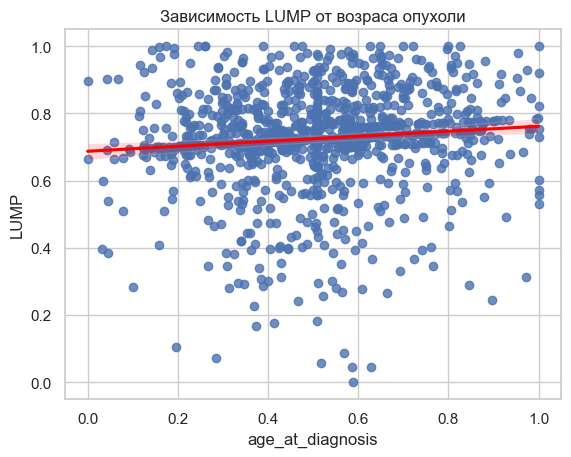

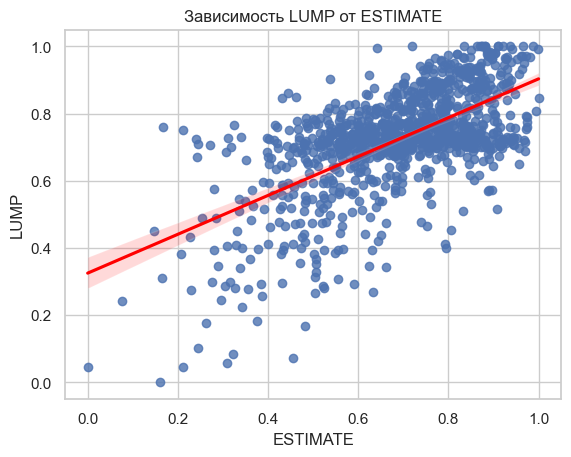

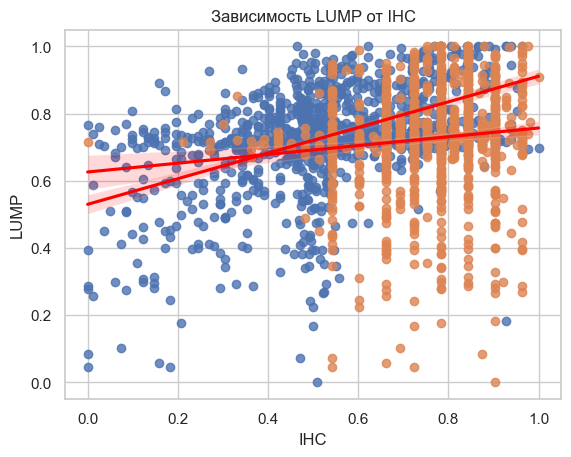

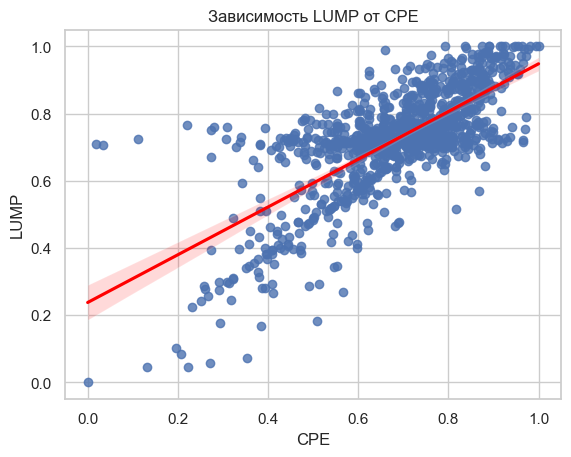

In [36]:
target_feature = dataframe['LUMP']
sns.regplot(x='age_at_diagnosis', y=target_feature, data = dataframe, line_kws={'color': 'red'}) 
plt.title("Зависимость LUMP от возраса опухоли")
plt.show()

sns.regplot(x='ESTIMATE', y = target_feature, data = dataframe, line_kws={'color': 'red'})
plt.title("Зависимость LUMP от ESTIMATE")
plt.show()

sns.regplot(x='ABSOLUTE', y = target_feature, data = dataframe, line_kws={'color': 'red'})
plt.title("Зависимость LUMP от ABSOLUTE")
plt.show

sns.regplot(x=dataframe['IHC'].astype(float), y = target_feature, data = dataframe, line_kws={'color': 'red'})
plt.title("Зависимость LUMP от IHC")
plt.show()

sns.regplot(x='CPE', y = target_feature, data = dataframe, line_kws={'color': 'red'})
plt.title("Зависимость LUMP от CPE")
plt.show()

Посмотрите так же на распределение самого `target` и сравните его с $N(a, \sigma^2)$, где а и $\sigma^2$ выборочное среднее и выборочная дисперсия `target` сооответсвенно

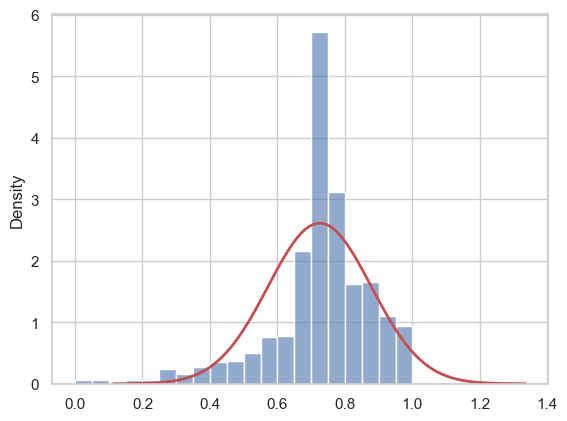

In [38]:
mu = target.mean()
sigma = target.std()
sns.histplot(target, stat='density', bins=20, alpha=0.6)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', linewidth=2, label=f'N({mu:.2f}, {sigma:.2f}²)')
plt.show()

**Вывод:**  

В целом распределение LUMP достаточно хорошо соответствует нормальному распределению

#### 3. Исследование модели sklearn

Обучите модель из готовой реализации sklearn, без учета смещения (`fit_intercept` = False)

In [40]:
sk_model = LinearRegression(fit_intercept=False)
sk_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",False
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Выведите коэфициенты и метрики $MSE\ MAE\ MAPE\ и\ R^2$, округлив до 3 знака


Коэффициенты:

In [44]:
np.round(sk_model.coef_, 3)

array([ 0.106,  0.102, -0.093,  0.143,  0.781])

Метрики:

Теперь обучите модель, установив параметр `fit_intercept` = True

In [45]:
sk_model = LinearRegression(fit_intercept=True)
sk_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Так же выведите коэфициенты и метрики $MSE\ MAE\ MAPE\ и\ R^2$, округлив до 3 знака и сравните модели. Почему качество отличается? Как это связанно с предыдущим исследованием линейной зависимости целевого признака от остальных? Проинтерпретируйте физический смысл метрик $MSE$ и $MAE$ на основании описания данных

In [48]:

theta_sklearn_with_intercept = np.r_[sk_model.intercept_, sk_model.coef_]

np.round(theta_sklearn_with_intercept, 3)

array([ 0.296,  0.042,  0.051, -0.035, -0.092,  0.672])

**Вывод:**  

Коэффициенты стали ощутимо (большая часть - в 2 раза) меньше. Что логично, учитывая, что сначала линейная регрессия выходила из нуля, а потом нет, а точки остались на местах


Проинтерпретируйте полученные коэффициенты модели, их знак и величину. Для этого отрисуйте гистограмму, где по $Ox$ отложены признаки, а по $Oy$ соответвующие им значения коэффициентов. Согласуется ли это с вашим пониманием сути вещей?

In [ ]:
<...>

**Вывод:**  

<...>

А теперь обучите модель на неотскалированных данных

In [ ]:
<...>

Постройте гистограмму, что изменилось? Какой теперь смысл имеют эти коэффициенты?

In [ ]:
<...>

Вывод:  

<...>

Нарисуйте графики линейной зависимости таргета от каждого признака по-отдельности, используя **размерные** коэффициенты обученной модели. Изобразите точки и линию их описывающую. Скомпонуйте графики в виде сетки. Сделайте выводы.

In [ ]:
def plot_linear_effects_grid(model: LinearRegression, X_train: pd.DataFrame, ncols: int = 4):
    """
    Сетка графиков для функций y = coef[i] * x_i + intercept
    (показывает наклон аппроксимационной прямой обученной линейной модели).

    Args:
        model (LinearRegression): обученная модель
        X_train (pd.DataFrame): обучающая выборка
        ncols (int): количество столбцов сетки графиков
    """
    names = <...>
    X = <...>

    coefs = <...>
    intercept = <...>

    n_feats = X.shape[1]
    nrows = int(np.ceil(n_feats / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(4.5*ncols, 3.5*nrows))
    axes = np.array(axes).ravel()

    for i, ax in enumerate(axes):
        if i >= n_feats:
            ax.axis("off")
            continue

        x = X[:, i]
        lo, hi = x.min(), x.max()   # границы сетки
        grid = np.linspace(lo, hi, 200)

        # линия модели
        <...>

        # точки (реальные значения признака → вклад в линейную часть)
        <...>

        # настройте внешний вид графика, если необходимо
        <...>

    plt.tight_layout()
    plt.show()


**Вывод:**  

<...>

### Задача 3

#### 1. Работа с категориальными признаками

Посмотрите на количество уникальных значений в категориальных признаках

In [ ]:
<...>

 Закодируйте категориальные признаки: к переменным, где присутствует более трёх категорий, примените преобразование `OneHotEncoder`, а менее &mdash; бинарным способом. Обратите внимание на аргументы [`drop`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) и `sparse_output`.

❗Фитим энкодер **только на train**, применяем к test❗

In [ ]:
<...>

In [ ]:
X_train, X_test, y_train, y_test = <...>

cat_features = <...>
num_features = <...>

In [ ]:
onehotencoder = <...>

X_train_cat = <...>
X_test_cat  = <...>

X_train_num = <...>
X_test_num  = <...>

Теперь объедините закодированные категориальные и вещественные признаки в один массив

In [ ]:
X_train_ohe = <...>
X_test_ohe = <...>

Посмотрите на частоту значений категориальных признаков (сколько раз встречается каждое из значений)

In [ ]:
<...>

Те значения, количество которых мало (меньше 30), образуют признаки, которые слабо связаны с target и скорреллированы между остальными этой же группы (групп `race`, `ethnicity` и `tumor_type`)  

Отберите эти малозначимые признаки и удалите их из образовавшейся выборки

In [ ]:
low_frec = <...>

In [ ]:
X_train_cat, X_test_cat = <...>

Обучите модель из библиотеки `sklearn` и посмотрите на ее коэффициенты и качество, округлив из до 3 знаков после запятой. (Не забудьте указать `fit_intercept = True`, для сравнимости с предыдущими экспериментами)

In [ ]:
<...>

In [ ]:
<...>

**Вывод:**  

<...>

## <font color="green">Сложная часть</font>

### Задача 4

#### 1. Реализация и исследование кастомной LinearRegression()

*Продолжайте использовать данные из предыдущих задач.*

На занятии мы вывели точную формулу для вектора $\widehat \theta$ в методе наименьших квадратов, а так же познакомились с решением методом градиентного спуска. В этой задаче вам предлагается объединить эти результаты.

Напишите собственную линейную регрессию c двумя методами обучения: расчёт коэффициентов через аналитический метод (формулу) и метод градиентного спуска для невзвешенного случая.

In [ ]:
class MyLinearRegression(BaseEstimator):
    """
    Простейшая линейная регрессия с двумя способами обучения:
    - 'formula' — аналитическая форма по нормальным уравнениям (OLS);
    - 'gd'      — градиентный спуск по MSE.

    Модель: y = X * theta + epsilon, где X ∈ R^{n×d}, y ∈ R^{n×1}.
    """

    def __init__(self,
                 method: str = 'formula',
                 intercept: bool = True,
                 learning_rate: float = 0.01,
                 iter: int = 50) -> None:
        """
        Параметры
        ----------
        method : {'formula','gd'}, default='formula'
            Метод обучения.
        intercept : bool, default=True
            Добавлять ли свободный член (столбец единиц).
            ВАЖНО: интерсепт добавляется и в fit(), и в predict().
        learning_rate : float, default=0.01
            Скорость обучения для GD.
        iter : int, default=50
            Максимальное число итераций для GD.
        """
        self.method = method
        self.intercept = intercept
        self.learning_rate = learning_rate
        self.iter = iter

        # Атрибуты, заполняемые после fit()
        self.n = None
        self.d = None
        self.theta = None         # shape (d, 1)
        self.coef_ = None         # alias на theta без интерсепта (если есть)
        self.intercept_ = None    # alias на свободный член (если есть)

    def fit(self, X: np.ndarray, y) -> "MyLinearRegression":
        """
        Обучает модель на данных (X, y).

        Поведение:
        - Если intercept=True, к X добавляется последний столбец единиц.
        - Далее вызывается выбранный метод: 'formula' или 'gd'.

        Параметры
        ----------
        X : np.ndarray, shape (n, d0)
            Матрица признаков (БЕЗ интерсепта — он добавится здесь при необходимости).
        y : pandas.Series или np.ndarray
            Вектор/столбец отклика.

        Возвращает
        ----------
        self : MyLinearRegression
        """
        # добавляем интерсепт, если требуется
        if self.intercept:
            X = <...>

        if self.method == 'formula':
            self.__fit_formula(X, y)
        else:
            self.__fit_gd(X, y)

        # после обучения:
        theta_1d = self.theta.ravel()
        if self.intercept:
            self.intercept_ = float(theta_1d[-1])
            self.coef_ = theta_1d[:-1].copy()
        else:
            self.intercept_ = 0.0
            self.coef_ = theta_1d.copy()

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Возвращает предсказания для новых объектов X.

        ВАЖНО:
        - Если intercept=True, здесь также добавляется столбец единиц.
        - Ожидается, что .fit() уже был вызван и self.theta определена.

        Параметры
        ----------
        X : np.ndarray, shape (n, d0)
            Матрица новых объектов (без интерсепта, если intercept=True).

        Возвращает
        ----------
        y_pred : np.ndarray, shape (n, 1)
            Вектор предсказаний.
        """
        if self.theta is None:
            raise RuntimeError("Сначала вызовите .fit(X, y) — параметры модели ещё не оценены.")

        if self.intercept:
            X = <...>

        y_pred = <...>
        return <...>

    def __fit_formula(self, X: np.ndarray, y) -> "MyLinearRegression":
        """
        Обучение в замкнутой форме по нормальным уравнениям (OLS).

        Предполагается модель: y = X * theta + epsilon,
        где:
            X — матрица признаков (n × d),
            y — столбец отклика (n × 1) или вектор длины n.

        ВАЖНО:
        - Интерсепт (столбец единиц) сюда уже добавлен в fit().

        Возвращает
        ----------
        self : MyLinearRegression
        """
        self.n, self.d = X.shape[0], X.shape[1]
        # привести y к столбцу (n,1)
        y = <...>
        # явная инверсия:
        theta = <...>
        # гарантируем столбец (d,1)
        self.theta = <...>
        return self

    def __fit_gd(self, X: np.ndarray, y) -> "MyLinearRegression":
        """
        Обучение градиентным спуском для MSE.

        Параметры
        ----------
        X : np.ndarray, shape (n, d)
            Матрица признаков (интерсепт уже добавлен в fit(), если intercept=True).
        y : pandas.Series или np.ndarray формы (n,) или (n,1)
            Целевой вектор. В исходной логике используется y.values для Series.

        Возвращает
        ----------
        self : MyLinearRegression
        """
        self.n, self.d = X.shape[0], X.shape[1]

        # инициализация параметров случайными малыми значениями
        self.theta = <...>

        # приведение target к (n, 1) — точно как в твоей версии
        # поддержка и pandas.Series, и np.ndarray
        y = <...>

        # базовый цикл градиентного спуска
        for _ in tqdm(range(self.iter)):
            # градиент MSE по theta
            gradients = <...>
            # шаг GD
            self.theta = <...>

        return self


Обучите собственную модель **c** добавлением свободного члена, используя формульный метод.

In [ ]:
<...>

 Выведите коэффициенты и значения метрик, округлив до 3 знака

In [ ]:
<...>

**Вывод:**  

<...>

#### 2. Исследование поведения GD для кастомной LinearRegression()

Теперь обучите собственную модель **c** добавлением свободного члена, используя метод градиентного спуска, укажите `iter`=10 и `learning_rate=1e-4`  

In [ ]:
<...>

Выведите коэфциенты и метрики, округлив до 3 знака и сравните модели. Что можно сказать о качестве модели? Из-за чего оно таким получилось?

In [ ]:
<...>

**Вывод:**  

<...>

Попробуйте увеличить количество итераций до $10^3$ и повторите эксперимент

In [ ]:
<...>

In [ ]:
<...>

**Вывод:**

<...>

Повторите предыдущий шаг, указав `learning_rate` повыше на несколько порядков, и выведите коэффициенты

In [ ]:
<...>

Вопрос: что случилось с коэффициентами?

**Вывод:**  

<...>

---
© 2026 команда <a href="https://thetahat.ru/">ThetaHat</a> для Phystech@DataScience